APRENDIZAJE AUTOMATICO.

**Actividad 1**

El objetivo de esta actividad es encontrar una posible relación o linealidad entre el PIB
(Producto Interno Bruto) de diferentes países del mundo. Los datos fueron descargados
del sitio del Banco Mundial.

El método que seguiremos es el siguiente:

● Preparación y organización de datos

● Exploración de los datos

● Modelado de datos

In [9]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuramos estilo de gráficos
sns.set(style="whitegrid")


In [10]:
# Cargamos el archivo CSV
df_pib = pd.read_csv('/content/pib_banco_mundial_50.csv',sep=';')

# Mostramos las primeras filas
df_pib.head()


,Country Name,Country Code,2019,2020,2021,2022,2023
0,Argentina,ARG,1.492100e+12,5.090000e+11,2.781000e+11,7.350000e+11,1.361300e+12
1,Brazil,BRA,8.961000e+11,2.279500e+12,1.978400e+12,1.322700e+12,1.234500e+12
2,United States,USA,2.164700e+12,6.277000e+11,6.323000e+11,1.705900e+12,1.531200e+12
3,China,CHN,8.600000e+09,1.491000e+11,1.204200e+12,2.200000e+12,9.592000e+11
4,India,IND,8.261000e+11,1.537000e+12,2.098200e+12,2.001300e+12,1.486400e+12


In [11]:
# Exploración de datos
# Verifica tipos de datos y nulos
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  51 non-null     object 
 1   Country Code  51 non-null     object 
 2   2019          51 non-null     float64
 3   2020          51 non-null     float64
 4   2021          51 non-null     float64
 5   2022          51 non-null     float64
 6   2023          51 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


Limpieza de columnas y conversión de tipos


Verificamos que no hay nulos y que los años ya están en formato float64


Graficar evolución del PIB por país

Vamos a graficar algunos países representativos para ver cómo evolucionó su PIB entre 2019 y 2023.

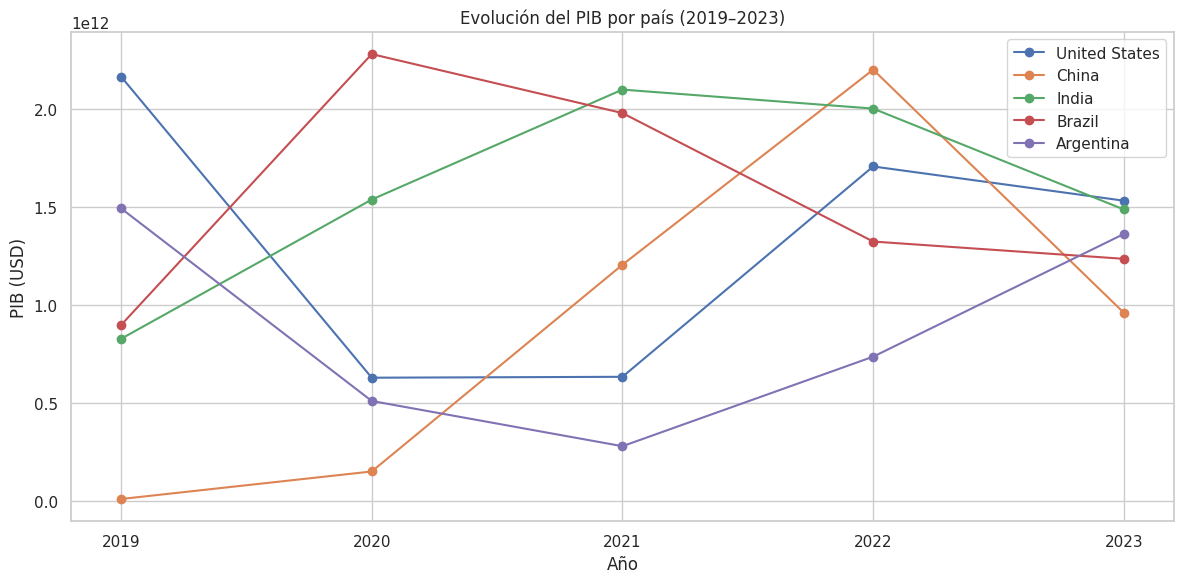

In [12]:
# Seleccionamos países para graficar
paises_a_graficar = ['United States', 'China', 'India', 'Brazil', 'Argentina']

# Transponemos para tener años como índice
df_plot = df_pib.set_index('Country Name').loc[paises_a_graficar].drop(columns='Country Code').T

# Convertimos el índice a tipo entero (años)
df_plot.index = df_plot.index.astype(int)

# Graficamos
plt.figure(figsize=(12,6))
for pais in df_plot.columns:
    plt.plot(df_plot.index, df_plot[pais], label=pais, marker='o')

plt.title('Evolución del PIB por país (2019–2023)')
plt.xlabel('Año')
plt.ylabel('PIB (USD)')
plt.legend()
plt.tight_layout()
plt.xticks(df_plot.index)  # fuerza que solo se muestren los años reales
plt.show()


**Observaciones:**

Estados Unidos presenta una caída inicial seguida de recuperación moderada.

China muestra un crecimiento sostenido, con un pico en 2022.

India alcanza su valor máximo en 2021 y luego desciende.

Brasil tiene una curva descendente desde 2020.

Argentina muestra una caída abrupta en 2020 y una recuperación progresiva.

In [13]:
# Extraemos la fila correspondiente a 'World'
fila_world = df_pib[df_pib['Country Name'] == 'World']

fila_world

,Country Name,Country Code,2019,2020,2021,2022,2023
50,World,WLD,5.857570e+13,6.451670e+13,6.172130e+13,6.391170e+13,6.948090e+13


In [14]:
# Obtenemos los valores de PIB por año (excluyendo columnas no numéricas) y las extraemos como array
pib_mundial = fila_world.drop(columns=['Country Name', 'Country Code']).values.flatten()

pib_mundial

array([5.85757e+13, 6.45167e+13, 6.17213e+13, 6.39117e+13, 6.94809e+13])

Transponer el DataFrame para tener años como índice

In [15]:
# Creamos DataFrame transpuesto con países como columnas y años como índice
df_corr = df_pib.drop(columns='Country Code').set_index('Country Name').T

# Convertimos el índice a tipo entero (años)
df_corr.index = df_corr.index.astype(int)

# Agregamos la columna 'World' como PIB mundial
df_corr['World'] = pib_mundial

Visualizamos como se relaciona el **PIB de cada país con el PIB mundial**

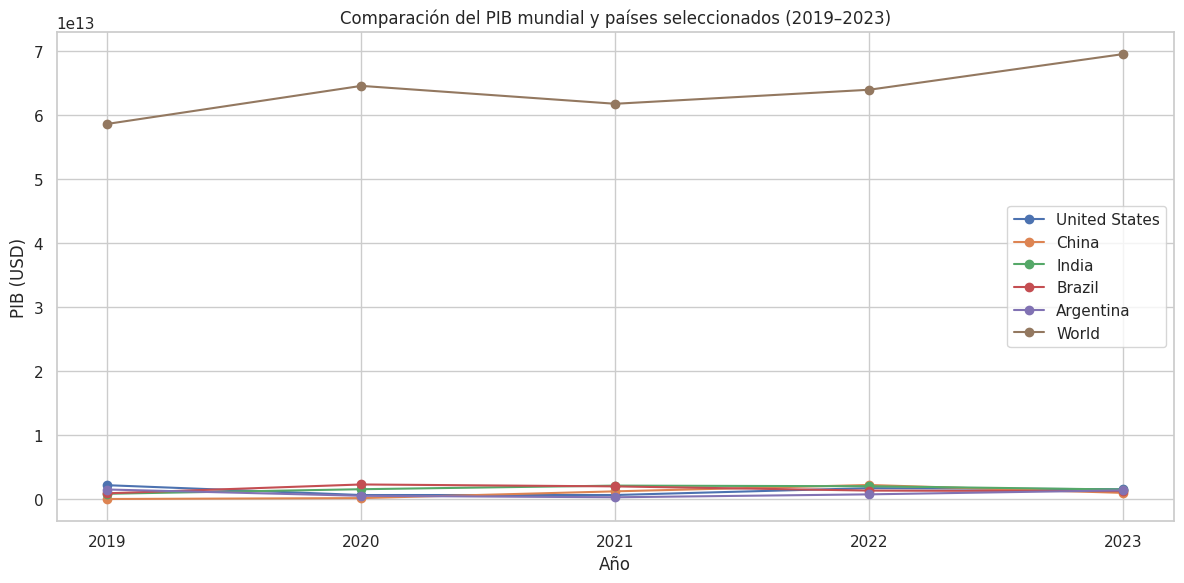

In [16]:
# Graficamos para mejor visualización
paises_a_graficar = ['United States', 'China', 'India', 'Brazil', 'Argentina', 'World']

plt.figure(figsize=(12,6))
for pais in paises_a_graficar:
    plt.plot(df_corr.index, df_corr[pais], label=pais, marker='o')

plt.title('Comparación del PIB mundial y países seleccionados (2019–2023)')
plt.xlabel('Año')
plt.ylabel('PIB (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(df_plot.index)  # fuerza que solo se muestren los años reales
plt.show()


En este caso el gráfico no dice mucho, las escalas son muy distintas: el PIB mundial es tan grande que aplasta visualmente las curvas de los países. Aunque estén en el mismo gráfico, no se perciben bien las diferencias.

Calcular correlaciones con el PIB mundial


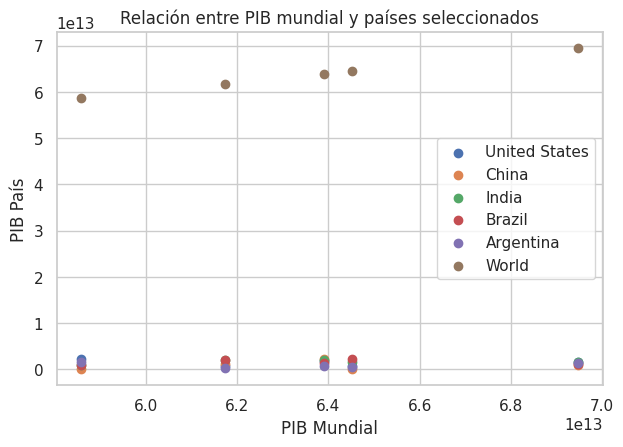

In [17]:
# Visualizar las correlaciones como dispersión PIB país vs. PIB mundial
for pais in paises_a_graficar:
    plt.scatter(df_corr['World'], df_corr[pais], label=pais)

plt.xlabel('PIB Mundial')
plt.ylabel('PIB País')
plt.title('Relación entre PIB mundial y países seleccionados')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##**En este punto vamos a llamar *Opción A* (predecir 'World' usando países) a los pasos que siguen a continuación, luego explicaremos porque tomamos la desición de una Opción B**

In [18]:
# Opción A
# Calculamos correlaciones entre países y 'World'
correlaciones = df_corr.corr()['World'].sort_values(ascending=False)
correlaciones = correlaciones.drop('World')  # quitamos autocorrelación

# Mostramos los países más correlacionados
print("Top países más correlacionados con el PIB mundial:")
print(correlaciones.head(10))


Top países más correlacionados con el PIB mundial:
Country Name
Chile          0.882378
South Korea    0.877127
Spain          0.839181
Colombia       0.827016
Vietnam        0.758632
Portugal       0.739286
Finland        0.681315
Bolivia        0.601279
Japan          0.592790
Greece         0.529007
Name: World, dtype: float64


Selección de países más correlacionados

In [19]:
# Seleccionamos los 5 países más correlacionados con el PIB mundial
top_paises = correlaciones.head(5).index.tolist()
print("Países seleccionados:", top_paises)


Países seleccionados: ['Chile', 'South Korea', 'Spain', 'Colombia', 'Vietnam']


Preparación de variables para el modelo

In [20]:
# X: PIB de los países seleccionados
X = df_corr[top_paises]

# y: PIB mundial (World)
y = df_corr['World']


División en entrenamiento y *prueba*

In [21]:
from sklearn.model_selection import train_test_split

# 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Entrenamiento del modelo de regresión lineal

In [22]:
from sklearn.linear_model import LinearRegression

# Creamos y entrenamos el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

Predicción y evaluación

In [23]:
# Predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Métricas de evaluación
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):,.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):,.2f}")


R²: -0.5880
MAE: 2,995,123,986,451.85
MSE: 9,783,193,645,521,546,755,702,784.00


**Opción A:** Modelo multivariable para predecir el PIB mundial.

En esta primera aproximación, se seleccionaron los cinco países más correlacionados con el PIB mundial y se utilizaron como variables independientes para entrenar un modelo de regresión lineal. El objetivo era predecir el PIB global a partir de sus valores.

Sin embargo, los resultados obtenidos muestran que el modelo no logra generalizar ni capturar una relación significativa:

**R²: -0.5880**, lo que indica que el modelo es peor que una predicción basada en el promedio.

**MAE y MSE extremadamente altos**, lo que refleja errores de magnitud considerable.

Esto puede deberse a varios factores:

La cantidad de datos es muy limitada (solo 5 años), lo que impide una división robusta entre entrenamiento y prueba.

Se realizo la prueba de usar 80/20, pero el valor de 20 % hacía que R² de "nan#, investigando encontré "El valor de R² (coeficiente de determinación) dio nan (Not a Number) porque el conjunto de datos de prueba (X_test, y_test) con el que estás evaluando el modelo tiene menos de dos muestras." (solo 5 años)

La correlación entre países y el PIB mundial puede estar influida por la estructura del dataset, pero no necesariamente implica capacidad predictiva.

El modelo puede estar sobreajustado en entrenamiento y fallar al generalizar en prueba.

Por estos motivos, se propone una segunda opción que invierte el enfoque: usar el PIB mundial como variable independiente para predecir el PIB de cada país por separado. Esto permite evaluar qué países responden mejor a las variaciones globales y obtener métricas más interpretables.

##**Opción B**
 Con el enfoque invertido: usar el PIB mundial como predictor para estimar el PIB de cada país por separado.

 Este modelo permite evaluar que países responden más directamente a las variaciones globales.

In [24]:
# Opción B (predecir cada país usando 'World')

# Preparación de variables
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Variable independiente: PIB mundial
X = df_corr['World'].values.reshape(-1, 1)

# Diccionario para guardar resultados
resultados_r2 = {}


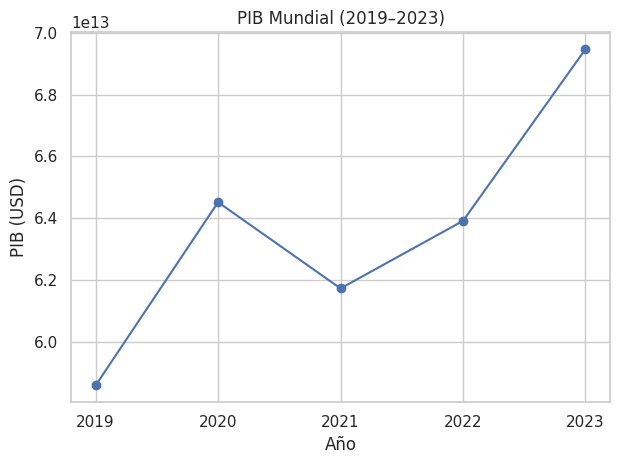

In [25]:
plt.plot(df_corr.index, df_corr['World'], marker='o')
plt.title('PIB Mundial (2019–2023)')
plt.xlabel('Año')
plt.ylabel('PIB (USD)')
plt.grid(True)
plt.tight_layout()
plt.xticks(df_plot.index)  # fuerza que solo se muestren los años reales
plt.show()


Este gráfico nos permite ver que el PIB mundial tiene una tendencia clara (creciente, decreciente, oscilante), lo cual es útil para usarlo como predictor.

In [26]:
# Ajuste de modelo por país
# Calculamos el R² para cada país, que mide que tan bien el PIB mundial explica su evolución.
for pais in df_corr.columns.drop('World'):

  # Extraemos los valores del PIB de ese país como variable dependiente.
    y = df_corr[pais].values

    # Ajustamos un modelo de regresión lineal simple (X es el PIB mundial Y es el PIB del país)
    modelo = LinearRegression().fit(X, y)
    r2 = modelo.score(X, y)

    # Guardamos los resultados en un diccionario
    resultados_r2[pais] = r2


In [27]:
# Visualizamos resultados
sorted_r2 = sorted(resultados_r2.items(), key=lambda x: x[1], reverse=True)
for pais, r2 in sorted_r2[:5]:
    print(f"{pais}: R² = {r2:.4f}")


Chile: R² = 0.7786
South Korea: R² = 0.7694
Spain: R² = 0.7042
Colombia: R² = 0.6840
Germany: R² = 0.6451


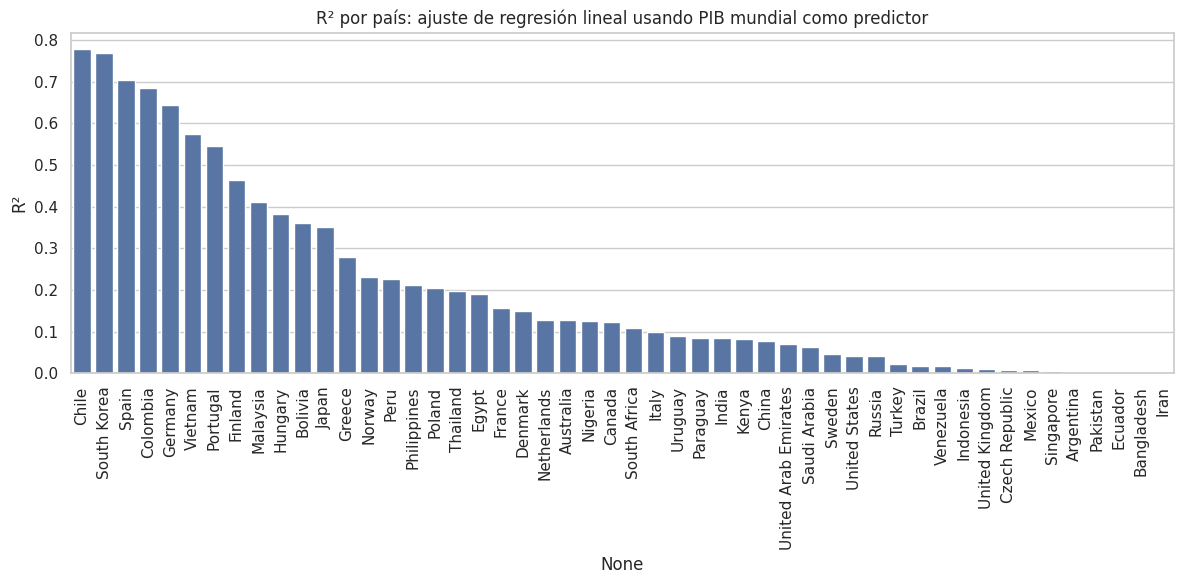

In [28]:
# Visualización de resultados
# Convertimos a DataFrame ordenado
df_r2 = pd.DataFrame.from_dict(resultados_r2, orient='index', columns=['R²']).sort_values(by='R²', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=df_r2.index, y=df_r2['R²'])
plt.xticks(rotation=90)
plt.title('R² por país: ajuste de regresión lineal usando PIB mundial como predictor')
plt.ylabel('R²')
plt.tight_layout()
plt.show()


Países con R² cercano a 1 tienen una evolución muy alineada con el PIB global.

Países con R² bajo o negativo tienen comportamientos más independientes o erráticos.

En esta segunda aproximación, se invirtió el enfoque: se utilizó el PIB mundial como variable independiente para predecir el PIB de cada país por separado. Esto permitió evaluar qué países responden más directamente a las variaciones globales.

El modelo de regresión lineal se ajustó individualmente por país, y se calculó el coeficiente de determinación R², que indica qué proporción de la variabilidad del PIB nacional puede explicarse por el PIB mundial.

Ventajas de este enfoque:

Proporciona una métrica clara y comparable entre países.

Permite detectar economías más sensibles al contexto global.

Evita el sobreajuste que se generaba al intentar predecir el PIB mundial con pocos datos.

Limitaciones:

La cantidad de años sigue siendo reducida (solo cinco), por lo que los resultados deben interpretarse con cautela.

No se consideran otros factores que podrían influir en el PIB nacional (políticas internas, comercio, etc.).

Este análisis complementa la opción A y aporta una perspectiva más granular sobre la relación entre el PIB mundial y el comportamiento económico de cada país.